In [462]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mf

In [463]:
# I took the data from HDFC bank, because HDFC bank is one of the most grown Bank in the world. 
# It was found in 1995, and in this short span of less than 30 years, it has surpassed
# many of the old and renowned bank to secure 10th position among the banks to have made 
# largest profit. It also rose during Corona unlike many of the banks. Even banks like JP Morgan 
# had to face losses, but HDFC had grown.
# This bank achieved it's all time best stock in the year 2021-22. That's why, to make a close study
# of this bank, I took the data of HDFC bank. I took the data of 2018 to 2023, 6 years. 
data = yf.download('HDFCBANK.NS', start='2018-01-01', end='2023-12-31',interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [464]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,936.349976,940.375000,925.250000,927.250000,889.052185,3290258
2018-01-02,929.275024,937.500000,929.275024,936.174988,897.609558,2388158
2018-01-03,937.500000,939.125000,925.599976,926.325012,888.165344,2265644
2018-01-04,926.500000,932.750000,926.500000,929.950012,891.640991,1186888
2018-01-05,931.500000,934.025024,927.775024,931.799988,893.414673,1435434
...,...,...,...,...,...,...
2023-12-22,1683.599976,1685.900024,1667.099976,1670.849976,1670.849976,24289425
2023-12-26,1673.250000,1685.949951,1668.550049,1682.449951,1682.449951,9022928
2023-12-27,1681.500000,1706.500000,1678.599976,1703.300049,1703.300049,13504539


In [465]:
# Tick size refers to the minimum price movement of an asset. 

# Tick size is important, because it plays a crucial role in shaping the overall trading environment
# by affecting liquidity, order execution, and price discovery in the stock market.
data['Tick_Size'] = data['High'] - data['Low']

In [466]:
# this is the library formed by me from the scratch. I made a different file for the functions for 
# improving the readability of code. 
import allTechnicalIndicators as ati

In [467]:

# Calculate Simple Moving Averages (SMA)
short_ma=ati.sma_20(data['Close'])
data['Short_MA'] =short_ma
long_ma =ati.sma_50(data['Close'])
data['Long_MA']=long_ma
# Calculate Exponential Moving Average (EMA)
ema_50= ati.ema(data['Close'],50)
data['EMA_50'] =ema_50
ema_200= ati.ema(data['Close'],200)
data['EMA_200'] =ema_200
# Calculate Relative Strength Index (RSI)
rsi_14 = ati.rsi(data['Close'])
data['RSI_14']=rsi_14
# Calculate Moving Average Convergence Divergence (MACD)
macd = ati.macd(data['Close'])
data['MACD'] = macd
# Calculate Average Directional Index (ADX)
stochastic_oscillator = ati.stochastic_oscillator(data['Close'],data['High'],data['Low'], 15)
data['stochastic_oscillator'] = stochastic_oscillator
adx_14 = ati.adx(data['High'], data['Low'], data['Close'], 14)
data['ADX_14']=adx_14


In [468]:
# Let's have a look at the opening prices as well
open_price = data['Open']
print(open_price)
open_price

Date
2018-01-01     936.349976
2018-01-02     929.275024
2018-01-03     937.500000
2018-01-04     926.500000
2018-01-05     931.500000
                 ...     
2023-12-22    1683.599976
2023-12-26    1673.250000
2023-12-27    1681.500000
2023-12-28    1709.300049
2023-12-29    1697.000000
Name: Open, Length: 1481, dtype: float64


Date
2018-01-01     936.349976
2018-01-02     929.275024
2018-01-03     937.500000
2018-01-04     926.500000
2018-01-05     931.500000
                 ...     
2023-12-22    1683.599976
2023-12-26    1673.250000
2023-12-27    1681.500000
2023-12-28    1709.300049
2023-12-29    1697.000000
Name: Open, Length: 1481, dtype: float64

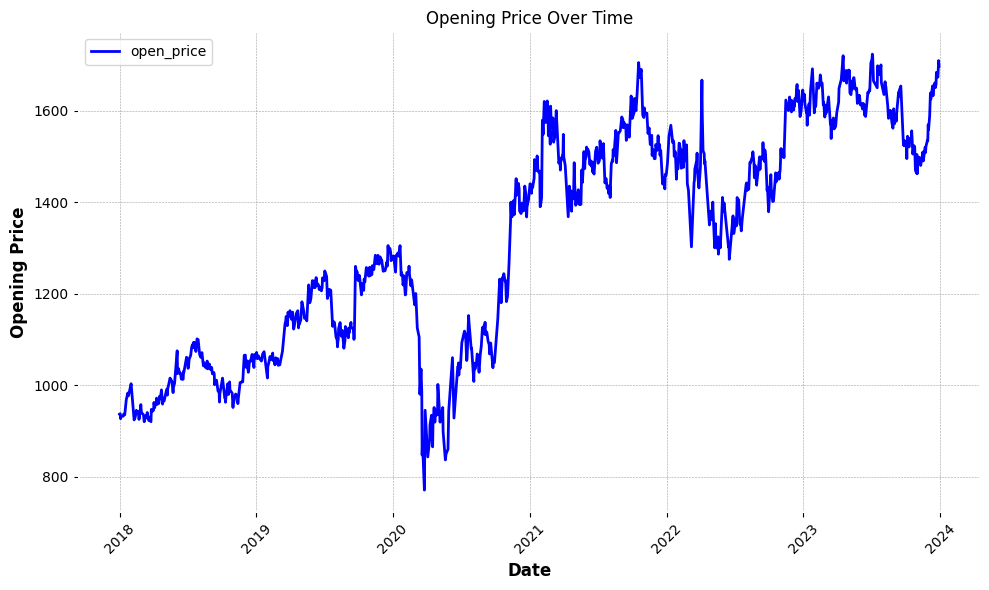

In [469]:
# Let's now visualise the data of closing prices using the matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the closing price data
ax.plot(open_price.index, open_price, color='blue', label='open_price')

# Adding title and labels
ax.set_title('Opening Price Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Opening Price')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [470]:
# Let's have a look at the closing price of each day.

close_price= data['Close']
print(close_price.shape)
close_price

(1481,)


Date
2018-01-01     927.250000
2018-01-02     936.174988
2018-01-03     926.325012
2018-01-04     929.950012
2018-01-05     931.799988
                 ...     
2023-12-22    1670.849976
2023-12-26    1682.449951
2023-12-27    1703.300049
2023-12-28    1705.250000
2023-12-29    1709.250000
Name: Close, Length: 1481, dtype: float64

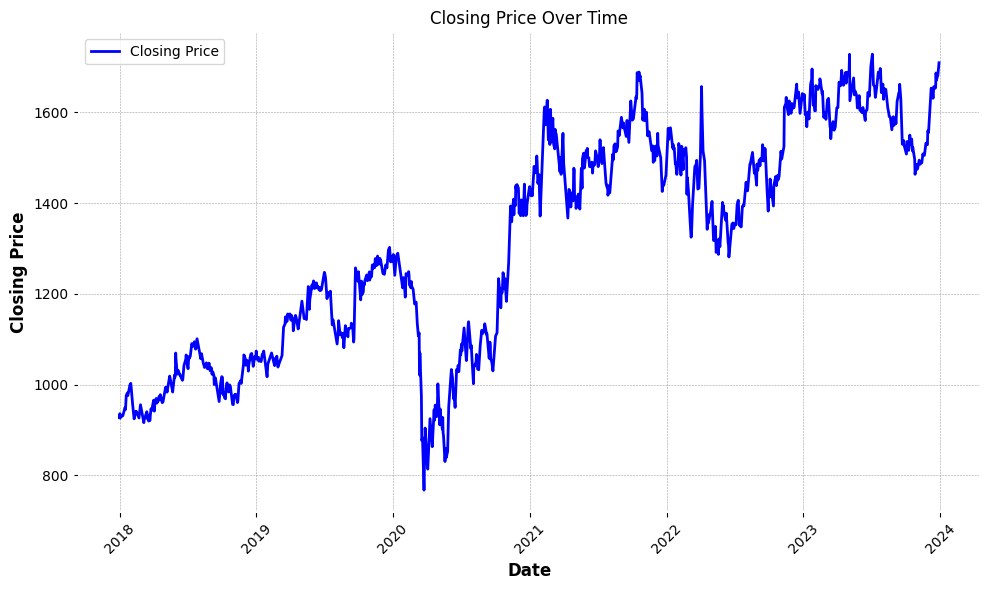

In [471]:
# Let's now visualise the data of closing prices using the matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the closing price data
ax.plot(close_price.index, close_price, color='blue', label='Closing Price')

# Adding title and labels
ax.set_title('Closing Price Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

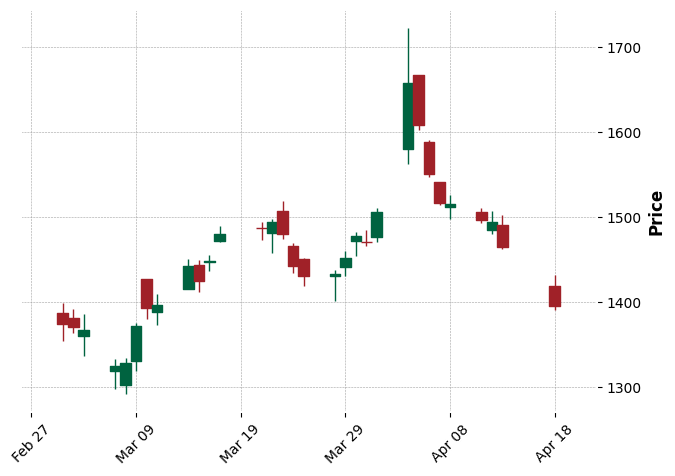

In [472]:
# Now, let's visualise the candle-stick plot of the stock prices which would contain both opening 
# and closing prices
# Plotting the candlestick chart

# I plotted this particular part of the time as candlestick for clarity, because, in this period only, 
# HDFC bank had seen it's all time highest stock price.

two_years = data.loc['2022-03-01':'2022-04-18']

# Adding opening and closing prices
mf.plot(two_years, type='candle', style='charles', ylabel='Price', ylabel_lower='Volume', show_nontrading=True)

In [473]:
close_prices_reset_index = close_price.reset_index(drop=True)
close_prices_reset_index

0        927.250000
1        936.174988
2        926.325012
3        929.950012
4        931.799988
           ...     
1476    1670.849976
1477    1682.449951
1478    1703.300049
1479    1705.250000
1480    1709.250000
Name: Close, Length: 1481, dtype: float64

In [474]:
# 1. Normalization (Min-Max Scaling)
min_price = close_prices_reset_index.min()
max_price = close_prices_reset_index.max()
normalized_prices = (close_prices_reset_index - min_price) / (max_price - min_price)

print(min_price)
print(max_price)
print(normalized_prices)

767.7000122070312
1728.199951171875
0       0.166111
1       0.175403
2       0.165148
3       0.168922
4       0.170849
          ...   
1476    0.940292
1477    0.952369
1478    0.974076
1479    0.976106
1480    0.980271
Name: Close, Length: 1481, dtype: float64


In [475]:
# 2.percentage change
percentage_change = close_prices_reset_index.pct_change()
percentage_change

0            NaN
1       0.009625
2      -0.010522
3       0.003913
4       0.001989
          ...   
1476   -0.009397
1477    0.006943
1478    0.012393
1479    0.001145
1480    0.002346
Name: Close, Length: 1481, dtype: float64

In [476]:
data['Normalized_Prices'] = normalized_prices
data['percentage_change'] = percentage_change

In [477]:
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-01  936.349976  940.375000  925.250000  927.250000  889.052185   
2018-01-02  929.275024  937.500000  929.275024  936.174988  897.609558   
2018-01-03  937.500000  939.125000  925.599976  926.325012  888.165344   
2018-01-04  926.500000  932.750000  926.500000  929.950012  891.640991   
2018-01-05  931.500000  934.025024  927.775024  931.799988  893.414673   

             Volume  Tick_Size  Short_MA  Long_MA     EMA_50    EMA_200  \
Date                                                                      
2018-01-01  3290258  15.125000       NaN      NaN  10.774726   2.697078   
2018-01-02  2388158   8.224976       NaN      NaN  21.875313   5.433704   
2018-01-03  2265644  13.525024       NaN      NaN  33.090312   8.155466   
2018-01-04  1186888   6.250000       NaN      NaN  44.578663  10.901483   
2018-01-05  1435434   6.250000 

In [478]:
# We will use the following indicators for predicting stock prices. I took Stochastic Oscillator 
# as an additional indicator. 
indicators_df = pd.DataFrame({
    'Close': data['Close'],
    'Short_MA':short_ma,
    'Long_MA': long_ma,
    'EMA_50': ema_50,
    'EMA_200': ema_200,
    'RSI_14': rsi_14,
    'MACD': macd,
    'ADX_14': adx_14,
    'stochastic_oscillator': stochastic_oscillator
})



In [479]:
def generate_signals(df):
    signals = []
    for i in range(len(df)):
        # This was the most interesting part of the task. Giving proper condition for efficient buying
        # and selling was challenging yet interesting.
        # I tried over more than around 20 times, changing various conditions on the indicators
        # and trying different indicators. I found this to be best fitting for the model
        if (df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i] and \
           df['EMA_50'].iloc[i] > df['EMA_200'].iloc[i] and \
           df['RSI_14'].iloc[i] > 50 and \
           df['MACD'].iloc[i] > 0 and \
           df['ADX_14'].iloc[i] > 25) or \
           (df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i] and \
           df['EMA_50'].iloc[i] > df['EMA_200'].iloc[i] and \
           df['stochastic_oscillator'].iloc[i] <= 20 and \
           df['MACD'].iloc[i] > 0 and \
           df['ADX_14'].iloc[i] > 25):                               # This is only for the stringth of the
            signals.append('Buy')
        # If sma becomes lesser than lma, then, stock should be preferably sold
        elif (df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i] or \
             df['EMA_50'].iloc[i] < df['EMA_200'].iloc[i]  and \
             df['ADX_14'].iloc[i] > 25) or \
             (df['RSI_14'].iloc[i] < 50 and \
             df['ADX_14'].iloc[i] > 25) or \
             (df['MACD'].iloc[i] < 0 and \
             df['ADX_14'].iloc[i] > 25) or \
             (df['stochastic_oscillator'].iloc[i] >= 80 and \
             (df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i] or \
             df['EMA_50'].iloc[i] < df['EMA_200'].iloc[i]) and \
             df['ADX_14'].iloc[i] > 25):     # Strong trend
            signals.append('Sell')
        else:
            signals.append('Hold')
    return signals
# Generate signals
indicators_df['Signal'] = generate_signals(indicators_df)

indicators_df


,Close,Short_MA,Long_MA,EMA_50,EMA_200,RSI_14,MACD,ADX_14,stochastic_oscillator,Signal
Date,,,,,,,,,,
2018-01-01,927.250000,NaN,NaN,10.774726,2.697078,77.614473,22.416370,NaN,-647.083405,Hold
2018-01-02,936.174988,NaN,NaN,21.875313,5.433704,77.614473,46.497390,NaN,-638.687372,Hold
2018-01-03,926.325012,NaN,NaN,33.090312,8.155466,77.614473,71.671120,NaN,-647.953572,Hold
2018-01-04,929.950012,NaN,NaN,44.578663,10.901483,77.614473,98.058863,NaN,-644.543414,Hold
2018-01-05,931.799988,NaN,NaN,56.325375,13.666715,77.614473,125.368020,NaN,-642.803080,Hold
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1670.849976,1621.250000,1550.486001,1536.547529,1611.407370,71.459432,4.010919,69.223980,52.445884,Sell
2023-12-26,1682.449951,1628.767499,1553.343000,1538.144524,1611.720154,73.561128,-0.998470,66.763629,63.358367,Sell
2023-12-27,1703.300049,1637.500000,1556.412002,1539.686286,1612.203233,76.859607,-7.912313,65.030711,82.972750,Sell


In [480]:
print(indicators_df )

                  Close     Short_MA      Long_MA       EMA_50      EMA_200  \
Date                                                                          
2018-01-01   927.250000          NaN          NaN    10.774726     2.697078   
2018-01-02   936.174988          NaN          NaN    21.875313     5.433704   
2018-01-03   926.325012          NaN          NaN    33.090312     8.155466   
2018-01-04   929.950012          NaN          NaN    44.578663    10.901483   
2018-01-05   931.799988          NaN          NaN    56.325375    13.666715   
...                 ...          ...          ...          ...          ...   
2023-12-22  1670.849976  1621.250000  1550.486001  1536.547529  1611.407370   
2023-12-26  1682.449951  1628.767499  1553.343000  1538.144524  1611.720154   
2023-12-27  1703.300049  1637.500000  1556.412002  1539.686286  1612.203233   
2023-12-28  1705.250000  1644.804999  1559.802002  1541.737049  1612.444500   
2023-12-29  1709.250000  1652.327496  1563.395002  1

### Now, we have to train, test and implement the logistic regresion model

In [481]:
indicators_df

,Close,Short_MA,Long_MA,EMA_50,EMA_200,RSI_14,MACD,ADX_14,stochastic_oscillator,Signal
Date,,,,,,,,,,
2018-01-01,927.250000,NaN,NaN,10.774726,2.697078,77.614473,22.416370,NaN,-647.083405,Hold
2018-01-02,936.174988,NaN,NaN,21.875313,5.433704,77.614473,46.497390,NaN,-638.687372,Hold
2018-01-03,926.325012,NaN,NaN,33.090312,8.155466,77.614473,71.671120,NaN,-647.953572,Hold
2018-01-04,929.950012,NaN,NaN,44.578663,10.901483,77.614473,98.058863,NaN,-644.543414,Hold
2018-01-05,931.799988,NaN,NaN,56.325375,13.666715,77.614473,125.368020,NaN,-642.803080,Hold
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1670.849976,1621.250000,1550.486001,1536.547529,1611.407370,71.459432,4.010919,69.223980,52.445884,Sell
2023-12-26,1682.449951,1628.767499,1553.343000,1538.144524,1611.720154,73.561128,-0.998470,66.763629,63.358367,Sell
2023-12-27,1703.300049,1637.500000,1556.412002,1539.686286,1612.203233,76.859607,-7.912313,65.030711,82.972750,Sell


In [482]:
from sklearn.linear_model import LogisticRegression

In [483]:
# On doing proper analysis of the data, we can find that the EMA_200 would contain NaN values 
# until the number of days becomes 200. So, it should be better to drop the column.

x_train = indicators_df[indicators_df.index.year < 2022][["Close", "Short_MA", "Long_MA", "EMA_50", "RSI_14", "MACD", "ADX_14"]]
y_train = indicators_df[indicators_df.index.year < 2022][["Signal"]]
x_test = indicators_df[indicators_df.index.year >= 2022][["Close", "Short_MA", "Long_MA", "EMA_50", "RSI_14", "MACD", "ADX_14"]]
y_test = indicators_df[indicators_df.index.year >= 2022][["Signal"]]

In [484]:
y_test

,Signal
Date,
2022-01-03,Sell
2022-01-04,Sell
2022-01-05,Sell
2022-01-06,Sell
2022-01-07,Sell
...,...
2023-12-22,Sell
2023-12-26,Sell
2023-12-27,Sell


In [485]:
y_train

,Signal
Date,
2018-01-01,Hold
2018-01-02,Hold
2018-01-03,Hold
2018-01-04,Hold
2018-01-05,Hold
...,...
2021-12-27,Sell
2021-12-28,Sell
2021-12-29,Sell


In [486]:
y_test.replace({'Buy': 1, 'Sell': -1, 'Hold': 0}, inplace=True)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_23828\3184918790.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({'Buy': 1, 'Sell': -1, 'Hold': 0}, inplace=True)


In [487]:
y_test

,Signal
Date,
2022-01-03,-1
2022-01-04,-1
2022-01-05,-1
2022-01-06,-1
2022-01-07,-1
...,...
2023-12-22,-1
2023-12-26,-1
2023-12-27,-1


In [488]:
x_train

,Close,Short_MA,Long_MA,EMA_50,RSI_14,MACD,ADX_14
Date,,,,,,,
2018-01-01,927.250000,NaN,NaN,10.774726,77.614473,22.416370,NaN
2018-01-02,936.174988,NaN,NaN,21.875313,77.614473,46.497390,NaN
2018-01-03,926.325012,NaN,NaN,33.090312,77.614473,71.671120,NaN
2018-01-04,929.950012,NaN,NaN,44.578663,77.614473,98.058863,NaN
2018-01-05,931.799988,NaN,NaN,56.325375,77.614473,125.368020,NaN
...,...,...,...,...,...,...,...
2021-12-27,1450.800049,1490.170013,1549.354009,1569.203320,36.926893,-9.943922,18.068227
2021-12-28,1460.800049,1488.532513,1544.822009,1564.133248,40.372225,-14.996934,22.042354
2021-12-29,1453.849976,1485.992511,1540.493008,1559.429150,38.786452,-17.764208,25.670231


In [489]:
x_test

,Close,Short_MA,Long_MA,EMA_50,RSI_14,MACD,ADX_14
Date,,,,,,,
2022-01-03,1519.650024,1481.865009,1528.927009,1544.958984,57.725368,-19.015894,31.144194
2022-01-04,1528.550049,1482.007513,1525.883010,1540.390691,59.612399,-14.540824,31.044338
2022-01-05,1564.849976,1482.560010,1524.040010,1536.915668,66.232918,-3.153697,30.603871
2022-01-06,1539.750000,1483.205011,1521.780010,1533.214345,59.027627,5.328710,31.357609
2022-01-07,1550.550049,1484.605011,1519.935010,1529.882973,60.993915,14.532704,35.163105
...,...,...,...,...,...,...,...
2023-12-22,1670.849976,1621.250000,1550.486001,1536.547529,71.459432,4.010919,69.223980
2023-12-26,1682.449951,1628.767499,1553.343000,1538.144524,73.561128,-0.998470,66.763629
2023-12-27,1703.300049,1637.500000,1556.412002,1539.686286,76.859607,-7.912313,65.030711


In [490]:
file_path = 'data.csv'

In [491]:
indicators_df.to_csv(file_path, index=False)

In [492]:
excel_file_path = 'output.xlsx'

In [493]:
indicators_df.to_excel(excel_file_path, index=False)

In [494]:
# Now, the column of EMA_200 is removed. Now we will remove the rows containing NaN values. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import LogReg

In [495]:
# Prepare the data
x_train = x_train.dropna()  # Remove rows with NaN values
y_train = y_train.loc[x_train.index]
x_test = x_test.dropna()  # Remove rows with NaN values
y_test = y_test.loc[x_test.index]

In [496]:
model = LogReg.MultivariableLogisticRegression()

In [497]:
print(x_train.shape)
print(y_train.shape)

(939, 7)
(939, 1)


In [498]:
y_train

,Signal
Date,
2018-03-14,Sell
2018-03-15,Sell
2018-03-16,Sell
2018-03-19,Sell
2018-03-20,Sell
...,...
2021-12-27,Sell
2021-12-28,Sell
2021-12-29,Sell


In [499]:
y_train.replace({'Buy': 1, 'Sell': -1, 'Hold': 0}, inplace=True)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_23828\209518594.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace({'Buy': 1, 'Sell': -1, 'Hold': 0}, inplace=True)


In [500]:
y_train

,Signal
Date,
2018-03-14,-1
2018-03-15,-1
2018-03-16,-1
2018-03-19,-1
2018-03-20,-1
...,...
2021-12-27,-1
2021-12-28,-1
2021-12-29,-1


In [501]:
model.fit(x_train, y_train.Signal)

c:\Users\ANSHUMAN\OneDrive\Desktop\QuantClub\Task02\Finalized_from_scratch\LogReg.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\ANSHUMAN\OneDrive\Desktop\QuantClub\Task02\Finalized_from_scratch\LogReg.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\ANSHUMAN\OneDrive\Desktop\QuantClub\Task02\Finalized_from_scratch\LogReg.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\ANSHUMAN\OneDrive\Desktop\QuantClub\Task02\Finalized_from_scratch\LogReg.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\ANSHUMAN\OneDrive\Desktop\QuantClub\Task02\Finalized_from_scratch\LogReg.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\ANSHUMAN\OneDrive\Desktop\QuantClub\Task02\Finalized_from_scratch\LogReg.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\ANSHUMAN\OneD

In [502]:
# # Predict the target values for the test data
# y_pred = model.predict(x_test)
# # Assuming x_test contains dates as index
# predictions_dict = dict(zip(x_test.index, y_pred))

y_pred = model.predict(x_test)

c:\Users\ANSHUMAN\OneDrive\Desktop\QuantClub\Task02\Finalized_from_scratch\LogReg.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [503]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [431]:
predictions_dict = dict(zip(x_test.index, y_pred))
predictions_dict

{Timestamp('2022-01-03 00:00:00'): 0,
 Timestamp('2022-01-04 00:00:00'): 0,
 Timestamp('2022-01-05 00:00:00'): 0,
 Timestamp('2022-01-06 00:00:00'): 0,
 Timestamp('2022-01-07 00:00:00'): 0,
 Timestamp('2022-01-10 00:00:00'): 0,
 Timestamp('2022-01-11 00:00:00'): 0,
 Timestamp('2022-01-12 00:00:00'): 0,
 Timestamp('2022-01-13 00:00:00'): 0,
 Timestamp('2022-01-14 00:00:00'): 0,
 Timestamp('2022-01-17 00:00:00'): 0,
 Timestamp('2022-01-18 00:00:00'): 0,
 Timestamp('2022-01-19 00:00:00'): 0,
 Timestamp('2022-01-20 00:00:00'): 0,
 Timestamp('2022-01-21 00:00:00'): 0,
 Timestamp('2022-01-24 00:00:00'): 0,
 Timestamp('2022-01-25 00:00:00'): 0,
 Timestamp('2022-01-27 00:00:00'): 0,
 Timestamp('2022-01-28 00:00:00'): 0,
 Timestamp('2022-01-31 00:00:00'): 0,
 Timestamp('2022-02-01 00:00:00'): 0,
 Timestamp('2022-02-02 00:00:00'): 0,
 Timestamp('2022-02-03 00:00:00'): 0,
 Timestamp('2022-02-04 00:00:00'): 0,
 Timestamp('2022-02-07 00:00:00'): 0,
 Timestamp('2022-02-08 00:00:00'): 0,
 Timestamp('

In [432]:
# Evaluate the performance of the model
accuracy_value = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_value)

Accuracy: 0.18255578093306288


In [433]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       372
           0       0.18      1.00      0.31        90
           1       0.00      0.00      0.00        31

    accuracy                           0.18       493
   macro avg       0.06      0.33      0.10       493
weighted avg       0.03      0.18      0.06       493



c:\Users\ANSHUMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ANSHUMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ANSHUMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av